In [1]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [43]:


# DataFrame to store the results
# this is global so that it can store results of repeated calls to 'train_model' 
#   and be accessed directly after training models  
df_scores = pd.DataFrame()
def df_scores_init():
    # Remove all rows        
    df_scores.drop(df_scores.index, inplace=True)
    # Remove all columns
    df_scores.drop(df_scores.columns, axis=1, inplace=True) 
    # Define the labels (metrics) for the model evaluation DataFrame
    labels = ['train_acc', 'test_acc', 'diff', 'r2', 'mse', 'rmse']
    # Write the metric labels to the 'Description' column
    df_scores['Description'] = labels
    # Use 'Description' as the index
    df_scores.set_index('Description', inplace=True)
df_scores_init()

# Validates a trained model by calculating key performance metrics
def validate_model(model, X_train, y_train, X_test, y_test):
    # pass in the model to validate and the required test and training data
    # return calculate metrics
    # Calculate training accuracy
    train_accuracy = model.score(X_train, y_train)
    # Calculate test accuracy
    test_accuracy = model.score(X_test, y_test)
     # Predict on the test data
    y_predict = model.predict(X_test)

    # Calculate additional performance metrics
    # R-squared score
    r2 = round(r2_score(y_test,y_predict),5)
    # Mean squared error
    mse = round(mean_squared_error(y_test, y_predict),4)
    # Root mean squared error
    rmse = round(np.sqrt(mse),4)

    return train_accuracy, test_accuracy, r2, mse, rmse
    
# Collects the results of a model evaluation and stores them in global 'df_scores'
def collectResults( model_label, train_acc, test_acc, r2, mse, rmse):
 
    df_scores[model_label] = [train_acc, test_acc, abs(test_acc-train_acc),r2, mse, rmse]
     
#Trains a machine learning model and evaluates its performance
def train_model(model, model_id,X_train,y_train,X_test,y_test):
    # pass in the model to be trained, an identifier for that model an test/train data
    # returns the trained model
    # Train the model on the training data
    model.fit(X_train,y_train)
    
    # Validate and capture metrics of the model
    train_acc, test_acc, r2_acc, mse, rmse= validate_model (model,X_train, y_train, X_test, y_test)

    # Collect the model evaluation results
    collectResults(model_id,train_acc,test_acc,r2_acc, mse, rmse)
    return model

In [44]:
# This function will categorize columns based on their data types
def columns_by_dtype(df):
    # df (pd.DataFrame): The DataFrame to work with
    # returns numeric and object column lists

    obj_col = []# List to hold object columns
    num_col = []# List to hold numerical columns


    # Iterate through columns and append them to the appropriate list
    for col in df.columns:
        if df[col].dtype == 'object':
            obj_col.append(col)
        else:
            num_col.append(col) 
    return obj_col, num_col


In [45]:
# Create instances of static objects 
# StandardScaler to normalize numerical columns
scaler = StandardScaler() 
# OneHotEncoder to encode object columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int') 
# Configure OneHotEncoder to output a DataFrame
ohe.set_output(transform="pandas")


# Prepares the DataFrame by scaling numerical columns and encoding categorical columns.
def prep_df(df, fit):
    # df (pd.DataFrame): The DataFrame to be prepared.
    # fit (bool): If True, fit the transformers. If False, apply transformations without fitting.
    # returns a dataFrame with scaled numerical columns and encoded categorical columns.
    
    # get the columns by data type
    obj_col, num_col = columns_by_dtype(df)

    # if the 'fit' flag is True then fit the transformers
    if fit:
        scaler.fit(df[num_col])
        ohe.fit(df[obj_col])

    # Transform numerical columns with the scaler
    scaled = pd.DataFrame(data=scaler.transform(df[num_col]), columns=num_col, index=df.index)

     # Transform object columns with the one-hot encoder
    encoded = pd.DataFrame(data=ohe.transform(df[obj_col]), columns=ohe.get_feature_names_out(), index=df.index)
    
    # Concatenate the scaled numerical and encoded categorical columns into a single DataFrame
    combined = pd.concat([scaled,encoded],axis=1)

    return combined


In [6]:
# Import data
file_path = "data/online_gaming_behavior_dataset.csv"
df = pd.read_csv(file_path)

In [7]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Assign 'EngagementLevel' column to 'y'
y = df['EngagementLevel'] 

# Drom the features that are no longer needed 
X = df.drop(columns=['EngagementLevel', 'PlayerID'])

# Apply LabelEncoder to convert object to numerics
y_le = le.fit_transform(y)

# Display the results
print(y_le) 
print(le.classes_) 


[2 2 0 ... 0 2 2]
['High' 'Low' 'Medium']


In [8]:
# Split the data into training and testing sets using random_state=365
X_train, X_test, y_train, y_test = train_test_split(X, y_le, random_state=365)

In [9]:
#process the model data using defined functions
X_train_processed = prep_df(X_train, True)
X_test_processed = prep_df(X_test, False)

# Check the results
X_test_processed

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Gender_Male,Location_Asia,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
28457,-0.496801,-0.784419,-0.500885,-0.775394,0.086459,-0.827296,-0.245748,0,1,1,...,0,0,0,0,0,1,0,0,1,0
2296,-0.995126,1.631747,-0.500885,1.300813,-0.464831,-1.700966,-0.870194,0,1,1,...,0,0,0,0,0,0,1,1,0,0
31547,0.699178,1.166385,-0.500885,1.300813,0.556076,0.430788,1.280674,1,0,0,...,0,1,0,1,0,0,0,0,0,1
12368,-1.692780,-1.333559,-0.500885,-0.948411,1.454474,-1.700966,0.517463,1,0,0,...,0,0,0,0,0,0,1,1,0,0
38315,-1.094791,-0.074475,1.996468,-0.429359,-1.730755,1.199617,1.627588,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,-0.596466,1.025055,-0.500885,0.954778,1.515728,0.186160,-0.037600,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1729,-1.094791,0.115974,1.996468,0.435727,1.556564,-0.827296,1.280674,1,0,0,...,0,1,0,0,0,1,0,0,1,0
24463,-0.696131,-1.059251,-0.500885,1.646847,1.352383,0.780255,-0.731428,0,1,0,...,0,0,0,1,0,0,0,1,0,0
17129,1.695828,1.359440,-0.500885,-0.775394,-0.505667,1.094776,1.488823,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [33]:
# initial models with no optimization 

# Create an instance of each model that we would like to try
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(random_state=1)
svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state=1)
gb_model = GradientBoostingClassifier(random_state=1)
ab_model = AdaBoostClassifier(random_state=1)


In [34]:
#train the models using the 'train_model' function previously defined 
# using this function allow us to train models the same way and allows 
# for updating the training process for all models in one location

knn_model = train_model(knn_model,"knn",X_train_processed,y_train,X_test_processed,y_test)
lr_model = train_model(lr_model, "lr",X_train_processed,y_train,X_test_processed,y_test)
svm_model = train_model(svm_model,"svm",X_train_processed,y_train,X_test_processed,y_test)
dt_model = train_model(lr_model, "dt",X_train_processed,y_train,X_test_processed,y_test)
rf_model = train_model(rf_model, "rf",X_train_processed,y_train,X_test_processed,y_test)
gb_model = train_model(gb_model, "gb",X_train_processed,y_train,X_test_processed,y_test)
ab_model = train_model(ab_model, "ab",X_train_processed,y_train,X_test_processed,y_test)

# As models are trained, the model metrics are recorded in 'df_scores' 
# View the metrics for each model. Which one is the best? looks like 
# GradientBoostingClassifier or RandomForestClassifier

# View the scores
df_scores

c:\Users\saund\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,knn,lr,svm,dt,rf,gb,ab
Description,,,,,,,
train_acc,0.830741,0.825079,0.826211,0.825079,1.000000,0.913439,0.809359
test_acc,0.741732,0.820861,0.818763,0.820861,0.894795,0.903887,0.805375
diff,0.089009,0.004218,0.007448,0.004218,0.105205,0.009552,0.003984
r2,0.195930,0.495830,0.491490,0.495830,0.653230,0.692440,0.392250
mse,0.555300,0.348200,0.351200,0.348200,0.239500,0.212400,0.419700
rmse,0.745200,0.590100,0.592600,0.590100,0.489400,0.460900,0.647800


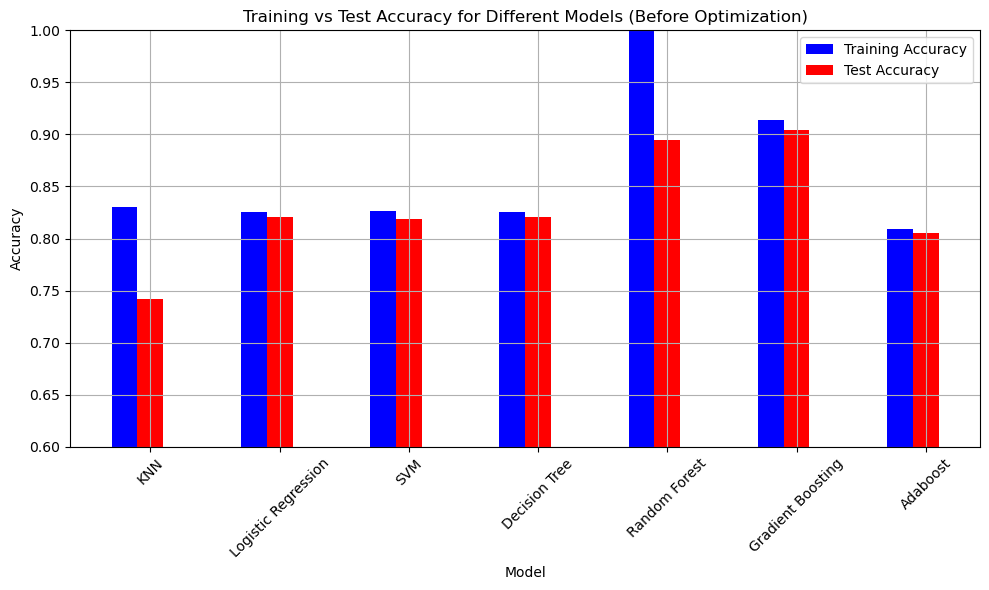

In [36]:
# Plot accuracy scores for non optimized models
# Create an array for positioning the bars
bar_width = 0.2
x_indexes = np.arange(len(df_scores.columns))  # Indexes for the model names

model_names = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Adaboost']

plt.figure(figsize=(10, 6))

# Plot the bar charts
plt.bar(x_indexes - bar_width, df_scores.loc['train_acc'], width=bar_width, label='Training Accuracy', color='b')
plt.bar(x_indexes, df_scores.loc['test_acc'], width=bar_width, label='Test Accuracy', color='r')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy for Different Models (Before Optimization)')

plt.ylim(0.6, 1)

# Rotate x-axis labels for readability
plt.xticks(ticks=x_indexes, labels=model_names, rotation=45)  # Model names on x-axis

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [39]:
# initial models with optimization
# Optimization done:
# KNN: n_neighbors = 7.  Identified using elbow plot
# Random Forest:  n_estimators = 128, max_depth = 11, criterion = entropy.  Identify by trying different criterion and elbow plot
# Gradient Boost: max_depth - 3, n_estimators = 128.  Identified by using elbow plot

# Create an instance of each model that we would like to try
knn_model = KNeighborsClassifier(n_neighbors=27)
lr_model = LogisticRegression(random_state=1)
svm_model = SVC(kernel='linear')
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=128, random_state=1,max_depth=11,criterion='entropy')
gb_model = GradientBoostingClassifier(random_state=1,max_depth=3,n_estimators=128)
ab_model = AdaBoostClassifier(random_state=1)


In [40]:
#train the models using the 'train_model' function previously defined 
# using this function allow us to train models the same way and allows 
# for updating the training process for all models in one location

knn_model = train_model(knn_model,"knn",X_train_processed,y_train,X_test_processed,y_test)
lr_model = train_model(lr_model, "lr",X_train_processed,y_train,X_test_processed,y_test)
svm_model = train_model(svm_model,"svm",X_train_processed,y_train,X_test_processed,y_test)
dt_model = train_model(lr_model, "dt",X_train_processed,y_train,X_test_processed,y_test)
rf_model = train_model(rf_model, "rf",X_train_processed,y_train,X_test_processed,y_test)
gb_model = train_model(gb_model, "gb",X_train_processed,y_train,X_test_processed,y_test)
ab_model = train_model(ab_model, "ab",X_train_processed,y_train,X_test_processed,y_test)

# As models are trained, the model metrics are recorded in 'df_scores' 
# View the metrics for each model. Which one is the best? looks like 
# GradientBoostingClassifier or RandomForestClassifier

# View the scores
df_scores

c:\Users\saund\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,knn,lr,svm,dt,rf,gb,ab
Description,,,,,,,
train_acc,0.823580,0.825079,0.826211,0.825079,0.921965,0.916503,0.809359
test_acc,0.810071,0.820861,0.818763,0.820861,0.890399,0.905385,0.805375
diff,0.013509,0.004218,0.007448,0.004218,0.031566,0.011118,0.003984
r2,0.442450,0.495830,0.491490,0.495830,0.639490,0.696340,0.392250
mse,0.385100,0.348200,0.351200,0.348200,0.249000,0.209700,0.419700
rmse,0.620600,0.590100,0.592600,0.590100,0.499000,0.457900,0.647800


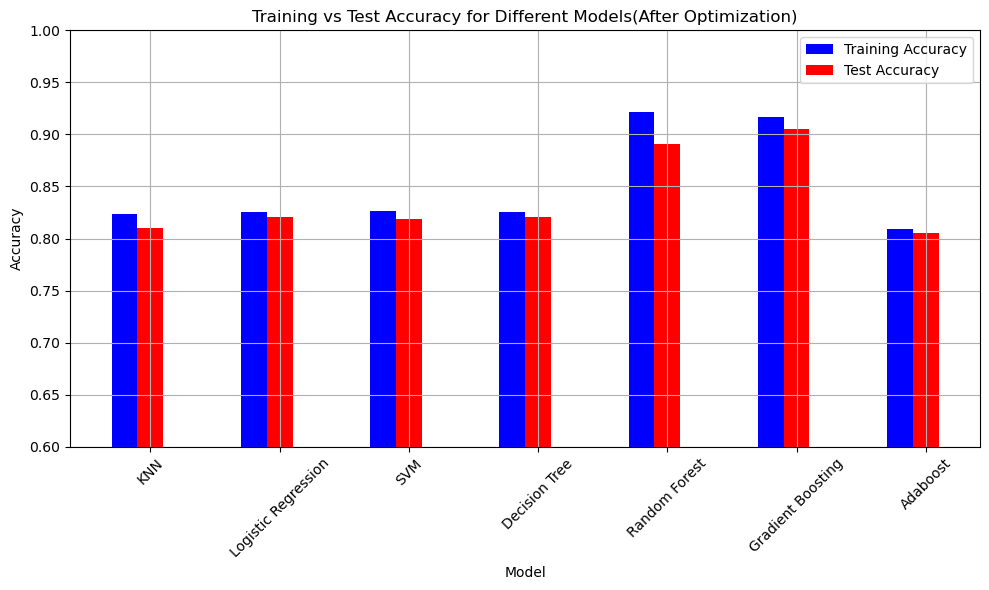

In [41]:
# Plot accuracy scores
# Create an array for positioning the bars
bar_width = 0.2
x_indexes = np.arange(len(df_scores.columns))  # Indexes for the model names

model_names = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Adaboost']

plt.figure(figsize=(10, 6))

# Plot the bar charts
plt.bar(x_indexes - bar_width, df_scores.loc['train_acc'], width=bar_width, label='Training Accuracy', color='b')
plt.bar(x_indexes, df_scores.loc['test_acc'], width=bar_width, label='Test Accuracy', color='r')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy for Different Models(After Optimization)')

plt.ylim(0.6, 1)

# Rotate x-axis labels for readability
plt.xticks(ticks=x_indexes, labels=model_names, rotation=45)  # Model names on x-axis

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [14]:
# Build out dataframe that model will use for predictions 

df_lm = pd.DataFrame(columns=X.columns)

# Mike S
new_row1 = {'Age': 57,
'Gender': 'Male',
'Location': 'USA',
 'GameGenre': 'Action',
'PlayTimeHours': 1.5,
'InGamePurchases': 0,
'GameDifficulty': 'Medium',
'SessionsPerWeek': 5,
'AvgSessionDurationMinutes':30,
'PlayerLevel':10,
'AchievementsUnlocked':8}

# Lonnie
new_row2 = {'Age': 49,
'Gender': 'Male',
'Location': 'USA',
 'GameGenre': 'RPG',
'PlayTimeHours': 6,
'InGamePurchases': 0,
'GameDifficulty': 'Medium',
'SessionsPerWeek': 5,
'AvgSessionDurationMinutes':180,
'PlayerLevel':20,
'AchievementsUnlocked':50}

# Joe
new_row3 = {'Age': 47,
'Gender': 'Male',
'Location': 'USA',
 'GameGenre': 'Sports',
'PlayTimeHours': 1,
'InGamePurchases': 0,
'GameDifficulty': 'Easy',
'SessionsPerWeek': .001,
'AvgSessionDurationMinutes':30,
'PlayerLevel':1,
'AchievementsUnlocked':0}

# Mike
new_row4 = {'Age': 42,
'Gender': 'Male',
'Location': 'USA',
 'GameGenre': 'Strategy',
'PlayTimeHours': 1,
'InGamePurchases': 0,
'GameDifficulty': 'Hard',
'SessionsPerWeek': 6,
'AvgSessionDurationMinutes':60,
'PlayerLevel':0,
'AchievementsUnlocked':0}

# Ryan
new_row5 = {'Age': 24,
'Gender': 'Male',
'Location': 'USA',
 'GameGenre': 'Sports',
'PlayTimeHours': 1,
'InGamePurchases': 0,
'GameDifficulty': 'Medium',
'SessionsPerWeek': 4,
'AvgSessionDurationMinutes':45,
'PlayerLevel':5,
'AchievementsUnlocked':10}

# Chelsey
new_row6 = {'Age': 36,
'Gender': 'Female',
'Location': 'USA',
 'GameGenre': 'Strategy',
'PlayTimeHours': 1,
'InGamePurchases': 0,
'GameDifficulty': 'Hard',
'SessionsPerWeek': 5,
'AvgSessionDurationMinutes':30,
'PlayerLevel':0,
'AchievementsUnlocked':0}

# Ronald
new_row7 = {'Age': 36,
'Gender': 'Male',
'Location': 'USA',
 'GameGenre': 'RPG',
'PlayTimeHours': 0,
'InGamePurchases': 0,
'GameDifficulty': 'Hard',
'SessionsPerWeek': 0,
'AvgSessionDurationMinutes':0,
'PlayerLevel':0,
'AchievementsUnlocked':0}

# Giselle
new_row8 = {'Age': 34,
'Gender': 'Female',
'Location': 'USA',
 'GameGenre': 'Strategy',
'PlayTimeHours': 0,
'InGamePurchases': 0,
'GameDifficulty': 'Easy',
'SessionsPerWeek': 0,
'AvgSessionDurationMinutes':0,
'PlayerLevel':0,
'AchievementsUnlocked':0}


df_lm.loc[len(df_lm)] = new_row1
df_lm.loc[len(df_lm)] = new_row2
df_lm.loc[len(df_lm)] = new_row3
df_lm.loc[len(df_lm)] = new_row4
df_lm.loc[len(df_lm)] = new_row5
df_lm.loc[len(df_lm)] = new_row6
df_lm.loc[len(df_lm)] = new_row7
df_lm.loc[len(df_lm)] = new_row8

df_lm


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,57,Male,USA,Action,1.5,0,Medium,5.000,30,10,8
1,49,Male,USA,RPG,6.0,0,Medium,5.000,180,20,50
2,47,Male,USA,Sports,1.0,0,Easy,0.001,30,1,0
3,42,Male,USA,Strategy,1.0,0,Hard,6.000,60,0,0
4,24,Male,USA,Sports,1.0,0,Medium,4.000,45,5,10
5,36,Female,USA,Strategy,1.0,0,Hard,5.000,30,0,0
6,36,Male,USA,RPG,0.0,0,Hard,0.000,0,0,0
7,34,Female,USA,Strategy,0.0,0,Easy,0.000,0,0,0


In [15]:
# Prepare the data frame
df_lm_processed = prep_df(df_lm, False)

In [16]:
# run all models against Lonnie & Mike data

y_result = {
    "knn": knn_model.predict(df_lm_processed),
    "lr": lr_model.predict(df_lm_processed),
    "svm": svm_model.predict(df_lm_processed),
    "dt": dt_model.predict(df_lm_processed),
    "rf": rf_model.predict(df_lm_processed),
    "gb": gb_model.predict(df_lm_processed),
    "ab": ab_model.predict(df_lm_processed)
    }
y_result

{'knn': array([1, 2, 1, 1, 1, 1, 1, 1]),
 'lr': array([1, 2, 1, 1, 1, 1, 1, 1]),
 'svm': array([1, 2, 1, 1, 1, 1, 1, 1]),
 'dt': array([1, 2, 1, 1, 1, 1, 1, 1]),
 'rf': array([1, 2, 1, 2, 1, 1, 1, 1]),
 'gb': array([1, 2, 1, 2, 1, 1, 1, 1]),
 'ab': array([2, 2, 1, 2, 2, 2, 1, 1])}

In [17]:
# lookup classes by number
items = range(0, 3, 1)
for item in items:
    print(f'{item}: ', le.inverse_transform([item]))

0:  ['High']
1:  ['Low']
2:  ['Medium']


Content below was used for optimizing models. 

In [46]:
# look at KNN model and optimize n_neighbors
# Loop through different k values to find which has the highest accuracy

for k in range(1, 40, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model = train_model(knn_model,f"knn{k}",X_train_processed,y_train,X_test_processed,y_test)
df_scores


,knn1,knn3,knn5,knn7,knn9,knn11,knn13,knn15,knn17,knn19,knn21,knn23,knn25,knn27,knn29,knn31,knn33,knn35,knn37,knn39
Description,,,,,,,,,,,,,,,,,,,,
train_acc,1.000000,0.851724,0.830741,0.831674,0.828310,0.827943,0.829376,0.828943,0.827843,0.826611,0.826278,0.826811,0.824180,0.823580,0.822614,0.823181,0.822581,0.820749,0.819717,0.819850
test_acc,0.657109,0.705465,0.741732,0.762214,0.776701,0.784594,0.791687,0.797682,0.801179,0.805675,0.805675,0.806974,0.808073,0.810071,0.808672,0.807773,0.809272,0.809372,0.808173,0.809471
diff,0.342891,0.146258,0.089009,0.069460,0.051609,0.043350,0.037688,0.031260,0.026665,0.020936,0.020603,0.019837,0.016107,0.013509,0.013942,0.015408,0.013310,0.011378,0.011544,0.010379
r2,-0.060270,0.034480,0.195930,0.266390,0.323820,0.351740,0.378070,0.393700,0.410480,0.422630,0.423060,0.434060,0.436520,0.442450,0.439120,0.439990,0.438250,0.439700,0.434060,0.435500
mse,0.732200,0.666800,0.555300,0.506600,0.467000,0.447700,0.429500,0.418700,0.407100,0.398700,0.398400,0.390800,0.389100,0.385100,0.387400,0.386800,0.388000,0.387000,0.390800,0.389800
rmse,0.855700,0.816600,0.745200,0.711800,0.683400,0.669100,0.655400,0.647100,0.638000,0.631400,0.631200,0.625100,0.623800,0.620600,0.622400,0.621900,0.622900,0.622100,0.625100,0.624300


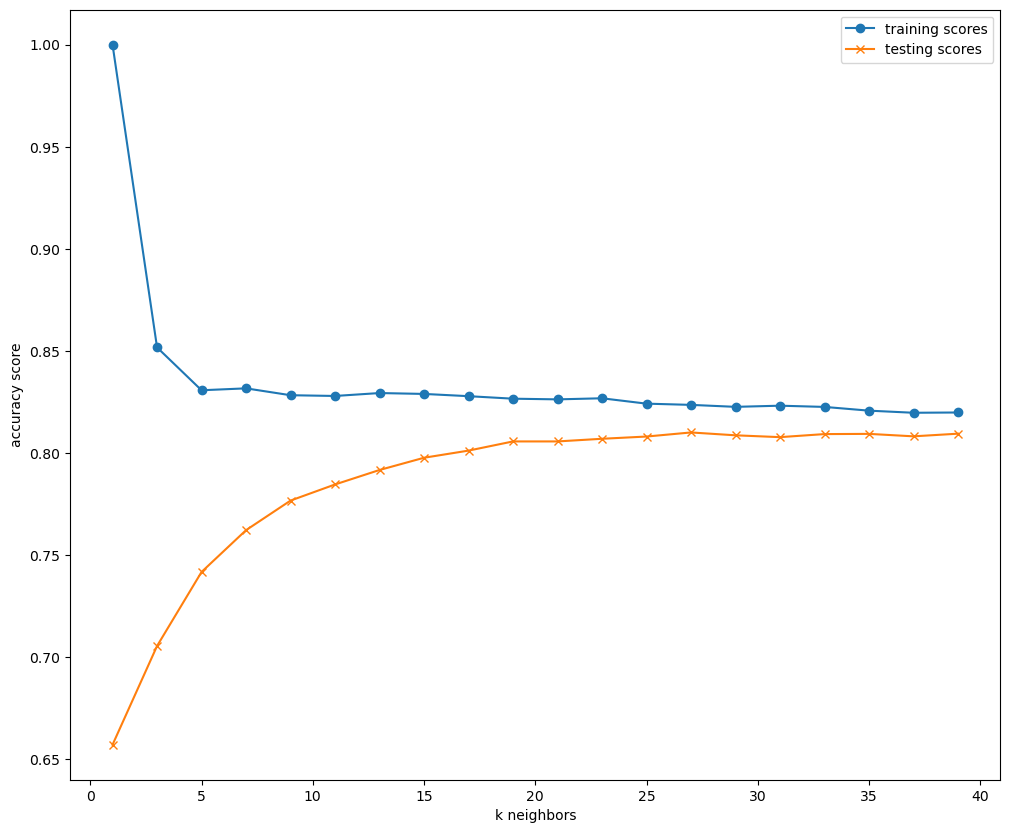

In [49]:
plt.figure(figsize=(12, 10))
plt.plot(range(1, 40, 2), df_scores.loc['train_acc'], marker='o', label="training scores")
plt.plot(range(1, 40, 2), df_scores.loc['test_acc'], marker='x', label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

# Use n_neighbors=27

In [18]:
# Optimize randomforest model
# Create a loop to vary the max_depth parameter

# # Depths should span from 1 up to 40 in steps of 2
depths = range(1, 20, 2)

# clear the scores dataframe
df_scores_init()

# Loop through each depth (this will take time to run)
for depth in depths:
    rf_model = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1)
    rf_model = train_model(rf_model, f"rf{depth}",X_train_processed,y_train,X_test_processed,y_test)

df_scores

,rf1,rf3,rf5,rf7,rf9,rf11,rf13,rf15,rf17,rf19
Description,,,,,,,,,,
train_acc,0.480133,0.622215,0.789908,0.842531,0.875903,0.907577,0.932356,0.957769,0.980949,0.995104
test_acc,0.495354,0.626736,0.789989,0.833150,0.856729,0.874813,0.883605,0.888600,0.893196,0.895094
diff,0.015221,0.004521,0.000081,0.009381,0.019174,0.032764,0.048752,0.069168,0.087753,0.100010
r2,-0.832660,-0.501800,0.366930,0.464150,0.509570,0.576120,0.604480,0.625600,0.644840,0.651490
mse,1.265700,1.037200,0.437200,0.370100,0.338700,0.292700,0.273200,0.258600,0.245300,0.240700
rmse,1.125000,1.018400,0.661200,0.608400,0.582000,0.541000,0.522700,0.508500,0.495300,0.490600


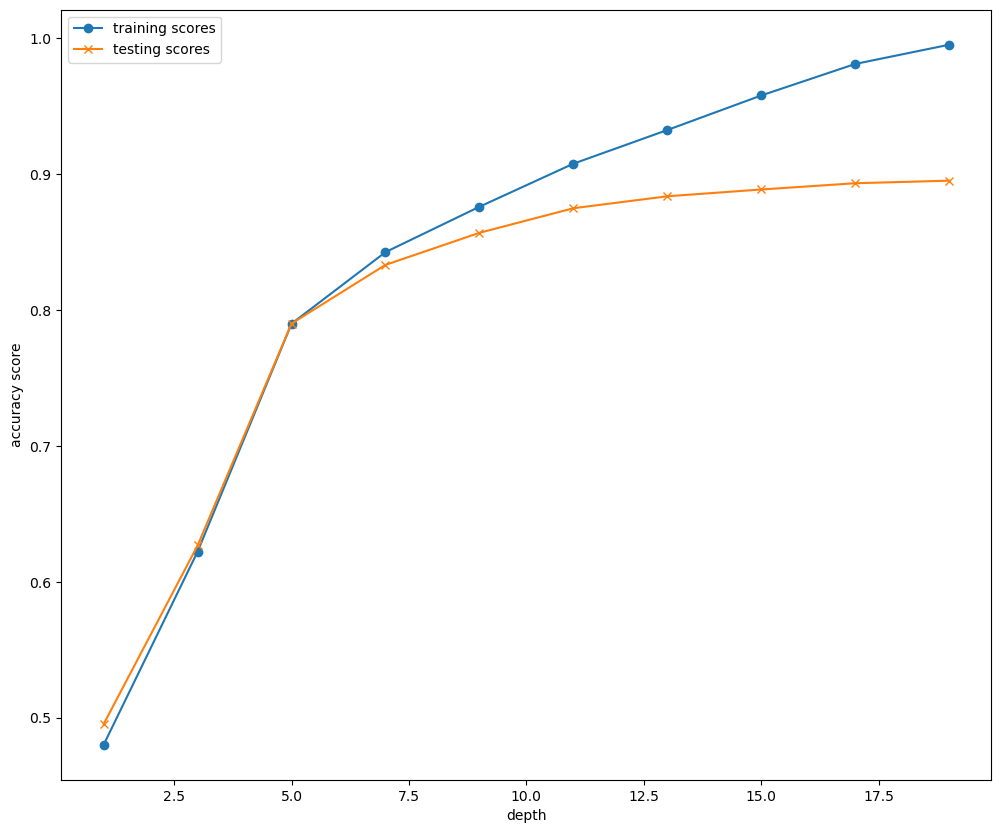

In [19]:
plt.figure(figsize=(12, 10))
plt.plot(range(1, 20, 2), df_scores.loc['train_acc'], marker='o', label="training scores")
plt.plot(range(1, 20, 2), df_scores.loc['test_acc'], marker='x', label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

# Use max_depth = 11train_acctrain_acctrain_acc

In [20]:
# change criterion to entropy and run again

# clear the scores dataframe
df_scores_init()

# Loop through each depth (this will take time to run)
for depth in depths:
    rf_model = RandomForestClassifier(n_estimators=128,max_depth=depth, random_state= 1, criterion='entropy')
    rf_model = train_model(rf_model, f"rf{depth}",X_train_processed,y_train,X_test_processed,y_test)

df_scores

,rf1,rf3,rf5,rf7,rf9,rf11,rf13,rf15,rf17,rf19
Description,,,,,,,,,,
train_acc,0.480133,0.685096,0.786511,0.863114,0.901582,0.921965,0.939384,0.963231,0.986245,0.998235
test_acc,0.495354,0.693975,0.786292,0.856529,0.882606,0.890399,0.894895,0.897792,0.900090,0.898391
diff,0.015221,0.008880,0.000219,0.006585,0.018976,0.031566,0.044489,0.065439,0.086155,0.099843
r2,-0.832660,0.168450,0.389360,0.547910,0.616480,0.639490,0.655980,0.664950,0.675650,0.671890
mse,1.265700,0.574300,0.421700,0.312200,0.264900,0.249000,0.237600,0.231400,0.224000,0.226600
rmse,1.125000,0.757800,0.649400,0.558700,0.514700,0.499000,0.487400,0.481000,0.473300,0.476000


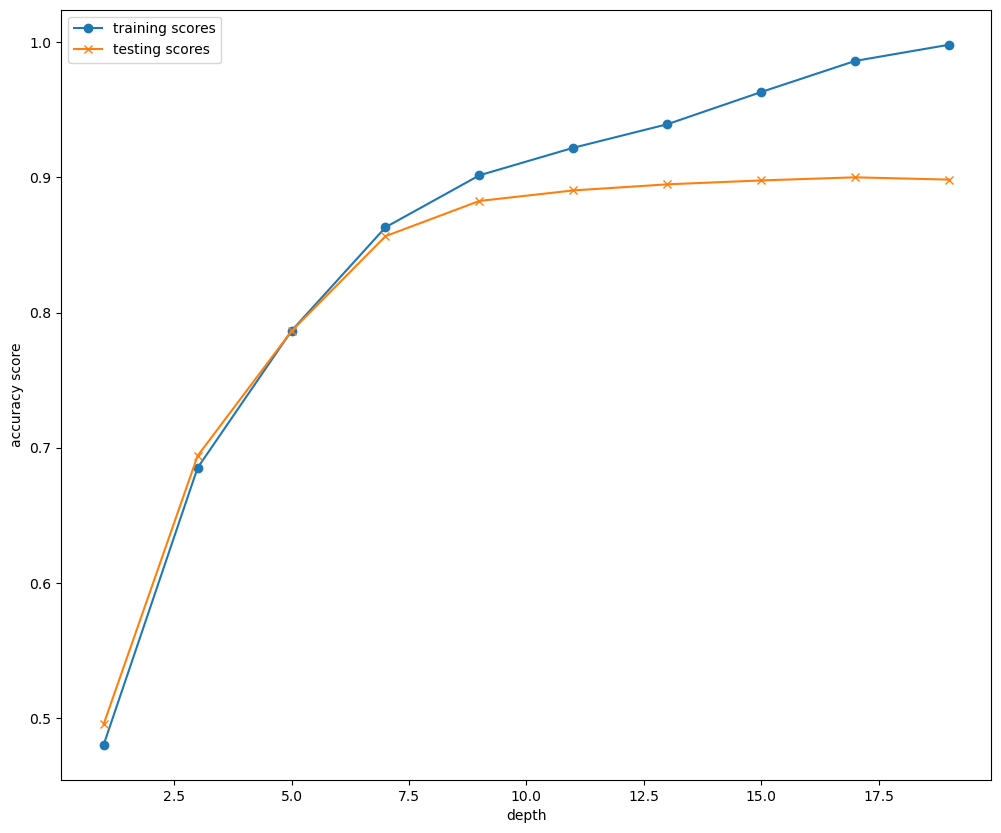

In [21]:
plt.figure(figsize=(12, 10))
plt.plot(range(1, 20, 2), df_scores.loc['train_acc'], marker='o', label="training scores")
plt.plot(range(1, 20, 2), df_scores.loc['test_acc'], marker='x', label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()


# use 11 max depth with criterion = entropy

In [22]:
#optimize gradient boost

# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# clear the scores dataframe
df_scores_init()

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 13, 2)

# Loop through each depth (this will take time to run)
for depth in depths:
    gb_model = GradientBoostingClassifier(random_state=1,n_estimators=128,max_depth=depth)
    gb_model = train_model(gb_model, f"rf{depth}",X_train_processed,y_train,X_test_processed,y_test)

df_scores

,rf1,rf3,rf5,rf7,rf9,rf11
Description,,,,,,
train_acc,0.847127,0.916503,0.932590,0.957735,0.999134,1.00000
test_acc,0.840244,0.905385,0.909881,0.911679,0.912279,0.91078
diff,0.006884,0.011118,0.022708,0.046056,0.086855,0.08922
r2,0.526500,0.696340,0.707190,0.714140,0.716740,0.71414
mse,0.327000,0.209700,0.202200,0.197400,0.195600,0.19740
rmse,0.571800,0.457900,0.449700,0.444300,0.442300,0.44430


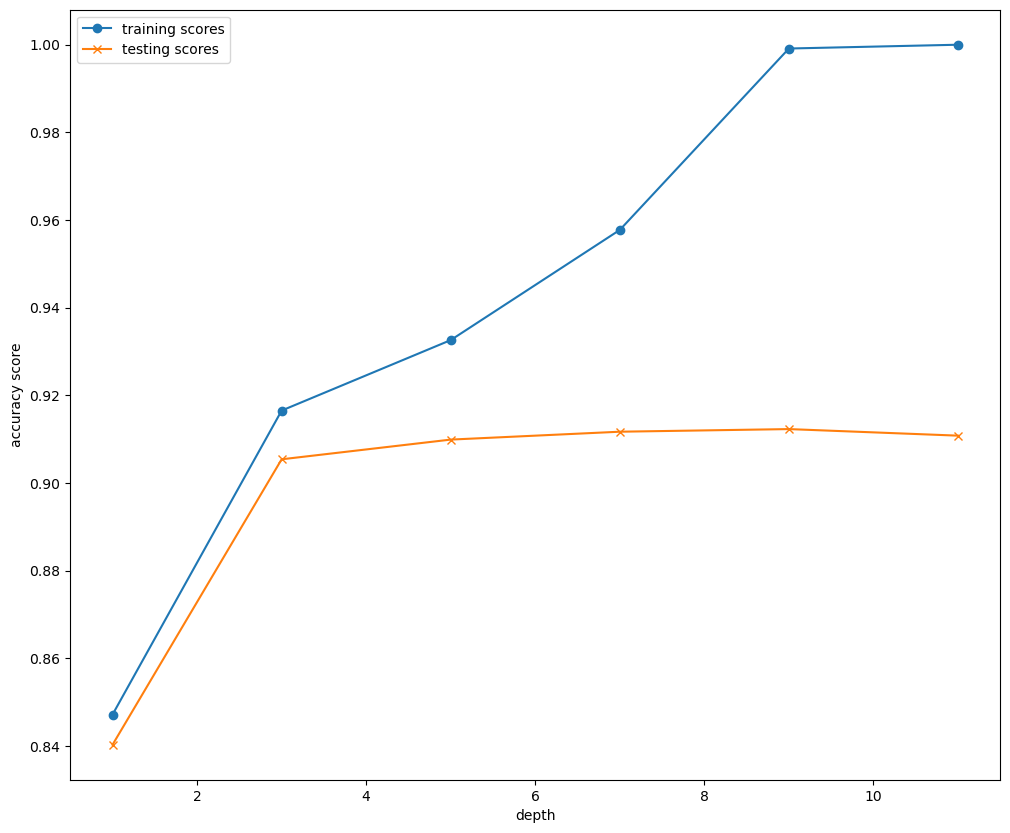

In [23]:
plt.figure(figsize=(12, 10))
plt.plot(range(1, 13, 2), df_scores.loc['train_acc'], marker='o', label="training scores")
plt.plot(range(1, 13, 2), df_scores.loc['test_acc'], marker='x', label="testing scores")
plt.xlabel("depth")
plt.ylabel("accuracy score")
plt.legend()
plt.show()